## Análises de Dados comparativos

### Biblioteca de data science

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats # Para testes ANOVA, comparação entre médias
from tabulate import tabulate

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# Para organizar resultados, gerar prints em amarelo

def print_y(text):
  """Imprime o texto fornecido na cor amarela.

  Args:
    text: O texto a ser impresso.
  """
  print(f"\033[33m ==> {text}\033[0m")

# Exemplo de uso:
print_y("Este texto será impresso em amarelo!")
print("Este em normal!")

 ==> Este texto será impresso em amarelo!
Este em normal!


## Exercícios 16/01/2025

In [3]:
ds1 = pd.read_csv('files_out/ds1_UF_mun_sexo&cor_10_19a22.csv')
ds1.head()

,setting,date,source,indicator_abbr,indicator_name,dimension,subgroup,estimate,se,ci_lb,ci_ub,population,note,setting_average,iso3,favourable_indicator,indicator_scale,ordered_dimension,subgroup_order,reference_subgroup
0,Rondônia,2019,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,471,NaN,NaN,NaN,3606.0,NaN,239,NaN,0,100000,0,0,0
1,Rondônia,2019,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,471,NaN,NaN,NaN,3606.0,NaN,239,NaN,0,100000,0,0,0
2,Rondônia,2019,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,471,NaN,NaN,NaN,3606.0,NaN,239,NaN,0,100000,0,0,0
3,Rondônia,2019,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,471,NaN,NaN,NaN,3606.0,NaN,239,NaN,0,100000,0,0,0
4,Rondônia,2019,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,471,NaN,NaN,NaN,3606.0,NaN,239,NaN,0,100000,0,0,0


### Regressão linear

In [22]:
import pandas as pd
import statsmodels.api as sm

# Carregar os dados
df = ds1

# Criar variáveis dummy para as variáveis categóricas
df = pd.get_dummies(df, columns=['setting', 'dimension', 'subgroup'])

# Modelar a regressão
X = df.drop('estimate', axis=1)
y = df['estimate']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

: 

### ANOVA

In [12]:
## Cada variável analisada por vez

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols



# Carregar os dados
df = ds1
# var_anova = df.setting

# ANOVA para a variável UF
model_uf = ols('estimate ~ C(setting)', data=df).fit()
anova_table_uf = sm.stats.anova_lm(model_uf, typ=2)
print(anova_table_uf)



# ANOVA para a variável municipio
model_municipio = ols('estimate ~ C(subgroup)', data=df).fit()
anova_table_municipio = sm.stats.anova_lm(model_municipio, typ=2)
print(anova_table_municipio)


# ... e assim por diante para as outras variáveis

                  sum_sq         df          F  PR(>F)
C(setting)  6.251699e+10       26.0  116.41687     0.0
Residual    5.595544e+13  2709153.0        NaN     NaN
                   sum_sq         df             F  PR(>F)
C(subgroup)  7.419247e+12        9.0  45954.581817     0.0
Residual     4.859871e+13  2709170.0           NaN     NaN


In [13]:
# ANOVA para a variável municipio
model_municipio = ols('estimate ~ C(dimension)', data=df).fit()
anova_table_municipio = sm.stats.anova_lm(model_municipio, typ=2)
print(anova_table_municipio)

MemoryError: Unable to allocate 112. GiB for an array with shape (2709180, 5570) and data type float64

In [14]:
# Todas as 

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Carregar os dados
df = ds1

# Modelar a ANOVA
model = ols('estimate ~ C(setting) + C(subgroup)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq         df             F  PR(>F)
C(setting)   2.014148e+11       26.0    433.639711     0.0
C(subgroup)  7.558145e+12        9.0  47009.288813     0.0
Residual     4.839730e+13  2709144.0           NaN     NaN


### Gerar dados gerais de população

In [ ]:
# Verificar população para 2022 under74
df_pop_under_temp = pd.read_parquet('files__temp/AvoidMort_v4_censo_pop_uf.parquet')

# mostrar dados gerais da tabela após transformações
tab = df_pop_under_temp
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de pop : {tab.pop_under74.sum()}')
# print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))


Registro da tabela : 54
Contagem de pop : 379903191
+----+-------+----------+-------------+---------------+---------+
|    |   Ano | uf_no    |   pop_total |   pop_under74 | uf_co   |
|----+-------+----------+-------------+---------------+---------|
|  0 |  2010 | Rondônia |     1562409 |       1537395 | _11     |
|  1 |  2010 | Acre     |      733559 |        721559 | _12     |
|  2 |  2010 | Amazonas |     3483985 |       3431598 | _13     |
|  3 |  2010 | Roraima  |      450479 |        445050 | _14     |
|  4 |  2010 | Pará     |     7581051 |       7450082 | _15     |
+----+-------+----------+-------------+---------------+---------+


In [ ]:

df_pop_under_temp01 = df_pop_under_temp[df_pop_under_temp['Ano']=='2022']

# mostrar dados gerais da tabela após transformações
tab = df_pop_under_temp01
popunder74_2022 = df_pop_under_temp01.pop_under74.sum()
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de pop : {popunder74_2022}')
# print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 27
Contagem de pop : 194646423
+----+-------+----------+-------------+---------------+---------+
|    |   Ano | uf_no    |   pop_total |   pop_under74 | uf_co   |
|----+-------+----------+-------------+---------------+---------|
| 27 |  2022 | Rondônia |     1581196 |       1537185 | _11     |
| 28 |  2022 | Acre     |      830018 |        810919 | _12     |
| 29 |  2022 | Amazonas |     3941613 |       3861307 | _13     |
| 30 |  2022 | Roraima  |      636707 |        626444 | _14     |
| 31 |  2022 | Pará     |     8120131 |       7905418 | _15     |
+----+-------+----------+-------------+---------------+---------+


# Medidas estatísticas básicas

In [3]:
do_temp = pd.read_csv('files_out/ds1_UF_mun_sexo&cor_10_19a22.csv')
do_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709180 entries, 0 to 2709179
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   setting               object 
 1   date                  int64  
 2   source                object 
 3   indicator_abbr        object 
 4   indicator_name        object 
 5   dimension             object 
 6   subgroup              object 
 7   estimate              int64  
 8   se                    float64
 9   ci_lb                 float64
 10  ci_ub                 float64
 11  population            float64
 12  note                  float64
 13  setting_average       int64  
 14  iso3                  float64
 15  favourable_indicator  int64  
 16  indicator_scale       int64  
 17  ordered_dimension     int64  
 18  subgroup_order        int64  
 19  reference_subgroup    int64  
dtypes: float64(6), int64(8), object(6)
memory usage: 413.4+ MB


In [11]:
do_temp01 = do_temp.loc[do_temp['date']== 2022]

do_temp01.head()

,setting,date,source,indicator_abbr,indicator_name,dimension,subgroup,estimate,se,ci_lb,ci_ub,population,note,setting_average,iso3,favourable_indicator,indicator_scale,ordered_dimension,subgroup_order,reference_subgroup
60,Rondônia,2022,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,637,NaN,NaN,NaN,3606.0,NaN,278,NaN,0,100000,0,0,0
61,Rondônia,2022,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,637,NaN,NaN,NaN,3606.0,NaN,278,NaN,0,100000,0,0,0
62,Rondônia,2022,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,637,NaN,NaN,NaN,3606.0,NaN,278,NaN,0,100000,0,0,0
63,Rondônia,2022,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,637,NaN,NaN,NaN,3606.0,NaN,278,NaN,0,100000,0,0,0
64,Rondônia,2022,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,637,NaN,NaN,NaN,3606.0,NaN,278,NaN,0,100000,0,0,0


In [12]:
do_temp01.estimate.describe()

count    557860.000000
mean        790.481483
std        5055.084301
min          15.000000
25%         169.000000
50%         277.000000
75%         443.000000
max      200000.000000
Name: estimate, dtype: float64

In [18]:
# Calcular o desvio padrão da coluna 'estimate' para cada ano
std_estimates_per_year = do_temp.groupby('date')['estimate'].std()

# Imprimir o resultado
print(std_estimates_per_year)

date
2010    2212.599281
2019    4579.561050
2020    5101.849756
2021    4973.901134
2022    5055.084301
Name: estimate, dtype: float64


In [19]:
# Calcular a matriz de correlação
correlation_matrix = do_temp.corr()

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

ValueError: could not convert string to float: 'Rondônia'

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


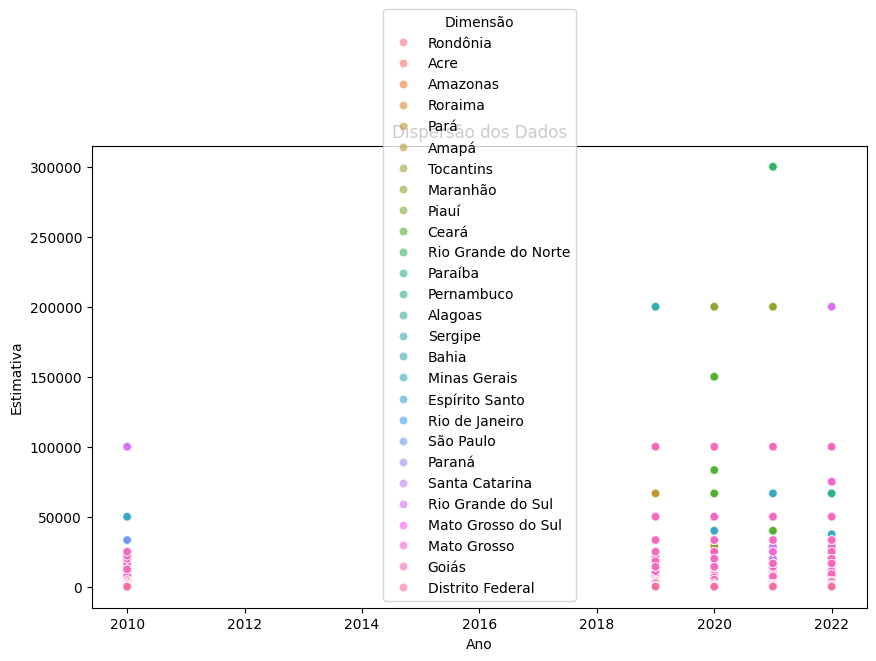

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=do_temp, x='date', y='estimate', hue='setting', alpha=0.6)
plt.title('Dispersão dos Dados')
plt.xlabel('Ano')
plt.ylabel('Estimativa')
plt.legend(title='Dimensão')
plt.show()

# Análises por dataset

## Base por UF

### Preparação do dataframe

In [187]:
do_temp = pd.read_parquet('files__temp/AvoidMort_v5_dobr_merged.parquet')
do_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47498 entries, 0 to 47497
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ANO_OBITO      47498 non-null  object
 1   uf             47498 non-null  object
 2   causes_deaths  47498 non-null  object
 3   Sexo           47498 non-null  object
 4   Cor ou raça    47498 non-null  object
 5   pop_under74    47498 non-null  int64 
 6   CONTADOR       47498 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.5+ MB


In [188]:
# mostrar dados gerais da tabela
tab = do_temp
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 47498
Contagem de óbitos : 4312347
+----+-------------+----------+-------------------------------------------+--------+---------------+---------------+------------+
|    |   ANO_OBITO | uf       | causes_deaths                             | Sexo   | Cor ou raça   |   pop_under74 |   CONTADOR |
|----+-------------+----------+-------------------------------------------+--------+---------------+---------------+------------|
|  0 |        2019 | Rondônia | Abscess of lung and mediastinum pyothorax | Homens | Branca        |        228640 |          1 |
|  1 |        2019 | Rondônia | Accidental Injuries                       | Homens | Branca        |        228640 |         47 |
|  2 |        2019 | Rondônia | Acute lower respiratory infections        | Homens | Branca        |        228640 |          1 |
|  3 |        2019 | Rondônia | Acute pancreatitis                        | Homens | Branca        |        228640 |          3 |
|  4 |        2019 | Rondônia | Al

In [189]:
do_temp.ANO_OBITO.unique()

array(['2019', '2020', '2021', '2022', '2010'], dtype=object)

In [190]:
# Filtrar o ano de 2022
do_temp01 = do_temp.loc[do_temp['ANO_OBITO'] =='2022']

# mostrar dados gerais da tabela após transformações
tab = do_temp01
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 9898
Contagem de óbitos : 860089
+-----+-------------+----------+-------------------------------------------+--------+---------------+---------------+------------+
|     |   ANO_OBITO | uf       | causes_deaths                             | Sexo   | Cor ou raça   |   pop_under74 |   CONTADOR |
|-----+-------------+----------+-------------------------------------------+--------+---------------+---------------+------------|
| 145 |        2022 | Rondônia | Abdominal hernia                          | Homens | Branca        |        228640 |          1 |
| 146 |        2022 | Rondônia | Abscess of lung and mediastinum pyothorax | Homens | Branca        |        228640 |          2 |
| 147 |        2022 | Rondônia | Accidental Injuries                       | Homens | Branca        |        228640 |         46 |
| 148 |        2022 | Rondônia | Acute lower respiratory infections        | Homens | Branca        |        228640 |          2 |
| 149 |        2022 | Rondôni

In [191]:
do_temp02 = do_temp01.copy()

# Incluir campo de flag de doença evitável ou não
do_temp02['avoid_flag'] = np.where(do_temp02['causes_deaths'].str.startswith('causa não evitável'), 'not_avoid', 'avoid')

# mostrar dados gerais da tabela após transformações
tab = do_temp02
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 9898
Contagem de óbitos : 860089
+-----+-------------+----------+-------------------------------------------+--------+---------------+---------------+------------+--------------+
|     |   ANO_OBITO | uf       | causes_deaths                             | Sexo   | Cor ou raça   |   pop_under74 |   CONTADOR | avoid_flag   |
|-----+-------------+----------+-------------------------------------------+--------+---------------+---------------+------------+--------------|
| 145 |        2022 | Rondônia | Abdominal hernia                          | Homens | Branca        |        228640 |          1 | avoid        |
| 146 |        2022 | Rondônia | Abscess of lung and mediastinum pyothorax | Homens | Branca        |        228640 |          2 | avoid        |
| 147 |        2022 | Rondônia | Accidental Injuries                       | Homens | Branca        |        228640 |         46 | avoid        |
| 148 |        2022 | Rondônia | Acute lower respiratory infections   

In [192]:
do_temp03 = do_temp02[do_temp02['avoid_flag'] == 'avoid']

# mostrar dados gerais da tabela após transformações
tab = do_temp03
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de pop : {tab.pop_under74.sum()}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 9633
Contagem de pop : 12108855399
Contagem de óbitos : 525676
+-----+-------------+----------+-------------------------------------------+--------+---------------+---------------+------------+--------------+
|     |   ANO_OBITO | uf       | causes_deaths                             | Sexo   | Cor ou raça   |   pop_under74 |   CONTADOR | avoid_flag   |
|-----+-------------+----------+-------------------------------------------+--------+---------------+---------------+------------+--------------|
| 145 |        2022 | Rondônia | Abdominal hernia                          | Homens | Branca        |        228640 |          1 | avoid        |
| 146 |        2022 | Rondônia | Abscess of lung and mediastinum pyothorax | Homens | Branca        |        228640 |          2 | avoid        |
| 147 |        2022 | Rondônia | Accidental Injuries                       | Homens | Branca        |        228640 |         46 | avoid        |
| 148 |        2022 | Rondônia | Acute l

In [193]:
# Agrupar por UF
do_temp04 = do_temp03.groupby([
                                   #       'Ano',
                                         'uf',
                                        #  'causes_deaths',
                                         'Sexo',
                                         'Cor ou raça',
                                        #  'pop_under74',
                                        #  'CONTADOR',
                                        #  'mort_ind',
                                   #       'avoid_flag'
                                         ]
                                        ).agg({'CONTADOR': 'sum',
                                               'pop_under74': 'max'}
                                               ).reset_index()

do_temp04['mort_ind'] = (do_temp04['CONTADOR']/do_temp04['pop_under74'])*100000

# mostrar dados gerais da tabela após transformações
tab = do_temp04
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de pop : {tab.pop_under74.sum()}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 269
Contagem de pop : 194635294
Contagem de óbitos : 525676
+----+------+--------+---------------+------------+---------------+------------+
|    | uf   | Sexo   | Cor ou raça   |   CONTADOR |   pop_under74 |   mort_ind |
|----+------+--------+---------------+------------+---------------+------------|
|  0 | Acre | Homens | Amarela       |          6 |           802 |    748.13  |
|  1 | Acre | Homens | Branca        |        145 |         83918 |    172.788 |
|  2 | Acre | Homens | Indígena      |         26 |         14524 |    179.014 |
|  3 | Acre | Homens | Parda         |        896 |        268648 |    333.522 |
|  4 | Acre | Homens | Preta         |         52 |         38401 |    135.413 |
+----+------+--------+---------------+------------+---------------+------------+


### Dataframe Pronto

In [194]:
# mostrar dados gerais da tabela após transformações
tab = do_temp04
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de pop : {tab.pop_under74.sum()}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 269
Contagem de pop : 194635294
Contagem de óbitos : 525676
+----+------+--------+---------------+------------+---------------+------------+
|    | uf   | Sexo   | Cor ou raça   |   CONTADOR |   pop_under74 |   mort_ind |
|----+------+--------+---------------+------------+---------------+------------|
|  0 | Acre | Homens | Amarela       |          6 |           802 |    748.13  |
|  1 | Acre | Homens | Branca        |        145 |         83918 |    172.788 |
|  2 | Acre | Homens | Indígena      |         26 |         14524 |    179.014 |
|  3 | Acre | Homens | Parda         |        896 |        268648 |    333.522 |
|  4 | Acre | Homens | Preta         |         52 |         38401 |    135.413 |
+----+------+--------+---------------+------------+---------------+------------+


In [195]:
# Excluir - só para teste
# Agrupar por UF
do_temp04_1 = do_temp04.groupby([
                                   #       'Ano',
                                        # 'CODMUNRES',   
                                         'uf',
                                        #  'causes_deaths',
                                        #  'Sexo',
                                        #  'Cor ou raça',
                                        #  'pop_under74',
                                        #  'CONTADOR',
                                        #  'mort_ind',
                                   #       'avoid_flag'

                                         ]
                                        ).agg({'CONTADOR': 'sum',
                                               'pop_under74': 'sum'}
                                               ).reset_index()

do_temp04_1['mort_ind_uf'] = (do_temp04_1['CONTADOR']/do_temp04_1['pop_under74'])*100000

# mostrar dados gerais da tabela após transformações
tab = do_temp04_1
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de pop : {tab.pop_under74.sum()}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 27
Contagem de pop : 194635294
Contagem de óbitos : 525676
+----+----------+------------+---------------+---------------+
|    | uf       |   CONTADOR |   pop_under74 |   mort_ind_uf |
|----+----------+------------+---------------+---------------|
|  0 | Acre     |       1691 |        810909 |       208.531 |
|  1 | Alagoas  |       8753 |       3023813 |       289.469 |
|  2 | Amapá    |       1718 |        719508 |       238.774 |
|  3 | Amazonas |       9021 |       3861194 |       233.632 |
|  4 | Bahia    |      36341 |      13527983 |       268.636 |
+----+----------+------------+---------------+---------------+


### UF - análise de variância (ANOVA)

In [197]:
# Criando um DataFrame com os dados

df = do_temp04_1

# Realizando a ANOVA e armazenando o p-valor
f_stat, p_val = stats.f_oneway(*[group['mort_ind_uf'] for name, group in df.groupby('uf')])

# Imprimindo o resultado
print("P-valor:", p_val)

# Interpretação do resultado (exemplo)
if p_val < 0.05:
    print_y("Existe diferença significativa entre as médias dos grupos.")
else:
    print_y("Não há evidência de diferença significativa entre as médias dos grupos.")

P-valor: nan
 ==> Não há evidência de diferença significativa entre as médias dos grupos.


/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:567: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/tmp/ipykernel_2173/176855359.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = stats.f_oneway(*[group['mort_ind_uf'] for name, group in df.groupby('uf')])


### Cor ou raça - análise de variância (ANOVA)

In [134]:
# Criando um DataFrame com os dados

df = do_temp04

# Realizando a ANOVA e armazenando o p-valor
f_stat, p_val = stats.f_oneway(*[group['mort_ind'] for name, group in df.groupby('Cor ou raça')])

# Imprimindo o resultado
print("P-valor:", p_val)

# Interpretação do resultado (exemplo)
if p_val < 0.05:
    print_y("Existe diferença significativa entre as médias dos grupos.")
else:
    print("Não há evidência de diferença significativa entre as médias dos grupos.")

P-valor: 2.238488862238828e-18
 ==> Existe diferença significativa entre as médias dos grupos.


### Sexo - análise de variãncia (t-student)

In [135]:

# Criando um DataFrame com os dados
df = do_temp04

# Separando os dados em dois grupos
grupo_A = df[df['Sexo'] == 'Homens']['mort_ind']
grupo_B = df[df['Sexo'] == 'Mulheres']['mort_ind']

# Realizando o teste t
t_stat, p_val = stats.ttest_ind(grupo_A, grupo_B, equal_var=False)

print("Estatística t:", t_stat)
print("P-valor:", p_val)

# Interpretando o resultado (exemplo)
if p_val < 0.05:
    print_y("Existe diferença significativa entre as médias dos grupos.")
else:
    print("Não há evidência de diferença significativa entre as médias dos grupos.")

Estatística t: 7.843379348617597
P-valor: 2.2896883820905516e-13
 ==> Existe diferença significativa entre as médias dos grupos.


## Base por Município

### Preparação do dataframe

In [176]:
dom_temp = pd.read_parquet('files__temp/AvoidMort_v4_dobr_merged.parquet')
dom_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472557 entries, 0 to 472556
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CODMUNRES      472557 non-null  object 
 1   ANO_OBITO      472557 non-null  object 
 2   POP_MERGE      472557 non-null  object 
 3   causes_deaths  472557 non-null  object 
 4   CONTADOR       472557 non-null  int64  
 5   pop_under74    472557 non-null  float64
 6   UF             472557 non-null  object 
 7   mun_no         472557 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 28.8+ MB


In [177]:
# mostrar dados gerais da tabela
tab = dom_temp
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de pop : {tab.pop_under74.sum()}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 472557
Contagem de pop : 39154073698.0
Contagem de óbitos : 4440843
+----+-------------+-------------+--------------+-------------------------------------------+------------+---------------+------+----------------------------+
|    | CODMUNRES   | ANO_OBITO   | POP_MERGE    | causes_deaths                             |   CONTADOR |   pop_under74 | UF   | mun_no                     |
|----+-------------+-------------+--------------+-------------------------------------------+------------+---------------+------+----------------------------|
|  0 | _110001     | _2010       | _2010_110001 | Accidental Injuries                       |          1 |         23948 | RO   | Alta Floresta D'Oeste (RO) |
|  1 | _110001     | _2010       | _2010_110001 | Alcohol-specific disorders and poisonings |          2 |         23948 | RO   | Alta Floresta D'Oeste (RO) |
|  2 | _110001     | _2010       | _2010_110001 | Appendicitis                              |          1 |         2

In [115]:
# Filtrar o ano de 2022
dom_temp01 = dom_temp.loc[dom_temp['ANO_OBITO'] =='_2022']

# mostrar dados gerais da tabela após transformações
tab = dom_temp01
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 99406
Contagem de óbitos : 875522
+----+-------------+-------------+--------------+-------------------------------------------+------------+---------------+------+----------------------------+
|    | CODMUNRES   | ANO_OBITO   | POP_MERGE    | causes_deaths                             |   CONTADOR |   pop_under74 | UF   | mun_no                     |
|----+-------------+-------------+--------------+-------------------------------------------+------------+---------------+------+----------------------------|
| 80 | _110001     | _2022       | _2022_110001 | Accidental Injuries                       |          1 |         20742 | RO   | Alta Floresta D'Oeste (RO) |
| 81 | _110001     | _2022       | _2022_110001 | Alcohol-specific disorders and poisonings |          1 |         20742 | RO   | Alta Floresta D'Oeste (RO) |
| 82 | _110001     | _2022       | _2022_110001 | Assault                                   |          3 |         20742 | RO   | Alta Floresta D'Oest

In [175]:
dom_temp02 = dom_temp01.copy()

# Incluir campo de flag de doença evitável ou não
dom_temp02['avoid_flag'] = np.where(dom_temp02['causes_deaths'].str.startswith('causa não evitável'), 'not_avoid', 'avoid')

# mostrar dados gerais da tabela após transformações
tab = dom_temp02
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 99406
Contagem de óbitos : 875522
+----+-------------+-------------+--------------+-------------------------------------------+------------+---------------+------+----------------------------+--------------+
|    | CODMUNRES   | ANO_OBITO   | POP_MERGE    | causes_deaths                             |   CONTADOR |   pop_under74 | UF   | mun_no                     | avoid_flag   |
|----+-------------+-------------+--------------+-------------------------------------------+------------+---------------+------+----------------------------+--------------|
| 80 | _110001     | _2022       | _2022_110001 | Accidental Injuries                       |          1 |         20742 | RO   | Alta Floresta D'Oeste (RO) | avoid        |
| 81 | _110001     | _2022       | _2022_110001 | Alcohol-specific disorders and poisonings |          1 |         20742 | RO   | Alta Floresta D'Oeste (RO) | avoid        |
| 82 | _110001     | _2022       | _2022_110001 | Assault                  

In [174]:
dom_temp03 = dom_temp02[dom_temp02['avoid_flag'] == 'avoid']

# mostrar dados gerais da tabela após transformações
tab = dom_temp03
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de pop : {tab.pop_under74.sum()}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 93853
Contagem de pop : 7951778491.0
Contagem de óbitos : 534729
+----+-------------+-------------+--------------+-------------------------------------------+------------+---------------+------+----------------------------+--------------+
|    | CODMUNRES   | ANO_OBITO   | POP_MERGE    | causes_deaths                             |   CONTADOR |   pop_under74 | UF   | mun_no                     | avoid_flag   |
|----+-------------+-------------+--------------+-------------------------------------------+------------+---------------+------+----------------------------+--------------|
| 80 | _110001     | _2022       | _2022_110001 | Accidental Injuries                       |          1 |         20742 | RO   | Alta Floresta D'Oeste (RO) | avoid        |
| 81 | _110001     | _2022       | _2022_110001 | Alcohol-specific disorders and poisonings |          1 |         20742 | RO   | Alta Floresta D'Oeste (RO) | avoid        |
| 82 | _110001     | _2022       | _2022_110

In [204]:
dom_temp03['mort_ind'] = (dom_temp03['CONTADOR']/dom_temp03['pop_under74'])*100000


In [ ]:
# Agrupar por município
dom_temp04_1 = dom_temp03.groupby([
                                   #       'Ano',
                                        'CODMUNRES',   
                                         'UF',
                                        #  'causes_deaths',
                                        #  'Sexo',
                                        #  'Cor ou raça',
                                        #  'pop_under74',
                                        #  'CONTADOR',
                                        #  'mort_ind',
                                   #       'avoid_flag'

                                         ]
                                        ).agg({'CONTADOR': 'sum',
                                               'pop_under74': 'min'}
                                               ).reset_index()



dom_temp04_1['mort_ind'] = (dom_temp04_1['CONTADOR']/dom_temp04_1['pop_under74'])*100000

# mostrar dados gerais da tabela após transformações
tab = dom_temp04_1
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de pop : {tab.pop_under74.sum()}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 5569
Contagem de pop : 194644474.0
Contagem de óbitos : 534729
+----+-------------+------+------------+---------------+------------+
|    | CODMUNRES   | UF   |   CONTADOR |   pop_under74 |   mort_ind |
|----+-------------+------+------------+---------------+------------|
|  0 | _110001     | RO   |         64 |         20742 |    308.553 |
|  1 | _110002     | RO   |        306 |         94271 |    324.596 |
|  2 | _110003     | RO   |         13 |          5093 |    255.252 |
|  3 | _110004     | RO   |        201 |         84146 |    238.871 |
|  4 | _110005     | RO   |         39 |         15292 |    255.035 |
+----+-------------+------+------------+---------------+------------+


### Dataframe Pronto

In [185]:

dom_temp04 = dom_temp04_1.copy()
dom_temp04['mort_ind'] = (dom_temp04['CONTADOR']/dom_temp04['pop_under74'])*100000


# mostrar dados gerais da tabela após transformações
tab = dom_temp04
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de pop : {tab.pop_under74.sum()}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

Registro da tabela : 5569
Contagem de pop : 194644474.0
Contagem de óbitos : 534729
+----+-------------+------+------------+---------------+------------+
|    | CODMUNRES   | UF   |   CONTADOR |   pop_under74 |   mort_ind |
|----+-------------+------+------------+---------------+------------|
|  0 | _110001     | RO   |         64 |         20742 |    308.553 |
|  1 | _110002     | RO   |        306 |         94271 |    324.596 |
|  2 | _110003     | RO   |         13 |          5093 |    255.252 |
|  3 | _110004     | RO   |        201 |         84146 |    238.871 |
|  4 | _110005     | RO   |         39 |         15292 |    255.035 |
+----+-------------+------+------------+---------------+------------+


In [3]:
dom_temp = pd.read_csv('files_out/ds1_UF_mun_sexo&cor_10_19a22.csv')
dom_temp.head()

,setting,date,source,indicator_abbr,indicator_name,dimension,subgroup,estimate,se,ci_lb,ci_ub,population,note,setting_average,iso3,favourable_indicator,indicator_scale,ordered_dimension,subgroup_order,reference_subgroup
0,Rondônia,2019,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,471,NaN,NaN,NaN,3606.0,NaN,239,NaN,0,100000,0,0,0
1,Rondônia,2019,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,471,NaN,NaN,NaN,3606.0,NaN,239,NaN,0,100000,0,0,0
2,Rondônia,2019,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,471,NaN,NaN,NaN,3606.0,NaN,239,NaN,0,100000,0,0,0
3,Rondônia,2019,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,471,NaN,NaN,NaN,3606.0,NaN,239,NaN,0,100000,0,0,0
4,Rondônia,2019,SIM/SUS & Censo/IBGE,AVM,Avoidable mortality (deaths per 100 000 popula...,Alta Floresta D'Oeste (RO),Homens - raça/cor Branca,471,NaN,NaN,NaN,3606.0,NaN,239,NaN,0,100000,0,0,0


### Município - análise de variância (ANOVA)

In [18]:
# Criando um DataFrame com os dados

df = dom_temp[dom_temp['date']==2022]

# Realizando a ANOVA e armazenando o p-valor
f_stat, p_val = stats.f_oneway(*[group['setting_average'] for name, group in df.groupby('setting')])

# Imprimindo o resultado
print("P-valor:", p_val)

# Interpretação do resultado (exemplo)
if p_val < 0.05:
    print_y("Existe diferença significativa entre as médias dos grupos.")
else:
    print("Não há evidência de diferença significativa entre as médias dos grupos.")

P-valor: 0.0
 ==> Existe diferença significativa entre as médias dos grupos.


/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [19]:
# Criando um DataFrame com os dados

df = dom_temp[dom_temp['date']==2022]

# Realizando a ANOVA e armazenando o p-valor
f_stat, p_val = stats.f_oneway(*[group['estimate'] for name, group in df.groupby('dimension')])

# Imprimindo o resultado
print("P-valor:", p_val)

# Interpretação do resultado (exemplo)
if p_val < 0.05:
    print_y("Existe diferença significativa entre as médias dos grupos.")
else:
    print("Não há evidência de diferença significativa entre as médias dos grupos.")

P-valor: 0.0
 ==> Existe diferença significativa entre as médias dos grupos.


In [15]:
dom_temp01 = dom_temp[dom_temp['date']==2022]
# Agrupar por município
dom_temp01_min = dom_temp01.groupby([
                                   #       'Ano',
                                        # 'CODMUNRES',   
                                         'setting',
                                        #  'causes_deaths',
                                        #  'Sexo',
                                        #  'Cor ou raça',
                                        #  'pop_under74',
                                        #  'CONTADOR',
                                        #  'mort_ind',
                                   #       'avoid_flag'

                                         ]
                                        ).agg({'setting_average': 'min'}
                                               ).reset_index()

# Agrupar por município
dom_temp01_mean = dom_temp01.groupby([
                                   #       'Ano',
                                        # 'CODMUNRES',   
                                         'setting',
                                        #  'causes_deaths',
                                        #  'Sexo',
                                        #  'Cor ou raça',
                                        #  'pop_under74',
                                        #  'CONTADOR',
                                        #  'mort_ind',
                                   #       'avoid_flag'

                                         ]
                                        ).agg({'setting_average': 'mean'}
                                               ).reset_index()

dom_temp01_mean.head()

,setting,setting_average
0,Acre,216.0
1,Alagoas,296.0
2,Amapá,244.0
3,Amazonas,238.0
4,Bahia,273.0


In [17]:
dom_temp01_min.head()

,setting,setting_average
0,Acre,216
1,Alagoas,296
2,Amapá,244
3,Amazonas,238
4,Bahia,273


In [20]:
# Criando um DataFrame com os dados

df = dom_temp01_min

# Realizando a ANOVA e armazenando o p-valor
f_stat, p_val = stats.f_oneway(*[group['setting_average'] for name, group in df.groupby('setting')])

# Imprimindo o resultado
print("P-valor:", p_val)

# Interpretação do resultado (exemplo)
if p_val < 0.05:
    print_y("Existe diferença significativa entre as médias dos grupos.")
else:
    print("Não há evidência de diferença significativa entre as médias dos grupos.")

P-valor: nan
Não há evidência de diferença significativa entre as médias dos grupos.


/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:567: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/tmp/ipykernel_39839/3614673345.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = stats.f_oneway(*[group['setting_average'] for name, group in df.groupby('setting')])


In [ ]:

dom_temp04_2['mort_ind'] = (dom_temp04_2['CONTADOR']/dom_temp04_2['pop_under74'])*100000

# mostrar dados gerais da tabela após transformações
tab = dom_temp04_2
print(f'Registro da tabela : {tab.shape[0]}')
print(f'Contagem de pop : {tab.pop_under74.sum()}')
print(f'Contagem de óbitos : {tab.CONTADOR.sum()}')
print(tabulate(tab.head(), headers='keys', tablefmt='psql'))

### UF - análise de variância (ANOVA)

In [206]:
# Criando um DataFrame com os dados

df = dom_temp03

# Realizando a ANOVA e armazenando o p-valor
f_stat, p_val = stats.f_oneway(*[group['mort_ind'] for name, group in df.groupby('UF')])

# Imprimindo o resultado
print("P-valor:", p_val)

# Interpretação do resultado (exemplo)
if p_val < 0.05:
    print_y("Existe diferença significativa entre as médias dos grupos.")
else:
    print("Não há evidência de diferença significativa entre as médias dos grupos.")

P-valor: 0.0
 ==> Existe diferença significativa entre as médias dos grupos.


## Outros Módulos

In [ ]:
import statsmodels.api as sm
df1 = dobr
var_cat = 'SEXO'
valor = 'mort_ind'



# Criando variáveis dummy para as categorias
df = pd.get_dummies(df1, columns=[var_cat])

# Modelo de regressão linear
model = sm.OLS(df[valor], df[var_cat])
results = model.fit()
print(results.summary())

In [ ]:
# ### Exemplo Completo para Análise de Catetorias
# import pandas as pd
# import seaborn as sns


# # Análise exploratória
# print(df.groupby('categoria')['valor'].describe())

# # Visualização
# sns.boxplot(x='categoria', y='valor', data=df)

# # Teste ANOVA
# from scipy import stats
# grupos = df.groupby('categoria')['valor'].apply(list)
# stats.f_oneway(*grupos)

In [ ]:
### Exemplo Completo para Análise de Catetorias
df = dobr
var_cat = 'SEXO'
valor = 'mort_ind'

# Análise exploratória
print(df.groupby(var_cat)[valor].describe())

# Visualização
sns.boxplot(x=var_cat, y=valor, data=df)

# Teste ANOVA
from scipy import stats
grupos = dobr.groupby(var_cat)[valor].apply(list)
stats.f_oneway(*grupos)

In [ ]:
# Calcular ANOVA
stats.f_oneway(valores_categoria1, valores_categoria2, ...)

In [ ]:
#Ajustar um tamanho para o gráfico (1000x1000)
plt.figure(figsize=(10, 10))

#Matriz de correlação
dataplot = sns.heatmap(dobr.corr(),
                       annot=True,
                       fmt='.1f') #annot são anotações e fmt a formatação dos valores

### Exemplos do gemini

In [87]:
import pandas as pd
from scipy import stats

# Criando um DataFrame com os dados
data = {'Fertilizante': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
        'Altura': [10, 12, 11, 15, 14, 16, 8, 9, 10]}
df = pd.DataFrame(data)

# Realizando a ANOVA
f_statistic, p_value = stats.f_oneway(df['Altura'][df['Fertilizante'] == 'A'],
                                   df['Altura'][df['Fertilizante'] == 'B'],
                                   df['Altura'][df['Fertilizante'] == 'C'])

# Imprimindo os resultados
print('F-statistic:', f_statistic)
print('p-value:', p_value)

F-statistic: 28.000000000000036
p-value: 0.0009063139874458697
